In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Helper to load a file like rho_out.txt
def load_field(filename):
    data = []
    zs = []
    with open(filename) as f:
        lines = f.readlines()
    i = 0
    while i < len(lines):
        # skip empty lines
        if not lines[i].strip():
            i += 1
            continue
        # first line is z
        z = float(lines[i].strip())
        zs.append(z)
        i += 1
        # next N lines until blank
        block = []
        while i < len(lines) and lines[i].strip():
            row = list(map(float, lines[i].split()))
            block.append(row)
            i += 1
        data.append(block)
    return np.array(zs), np.array(data)  # zs: (K,), data: (K, N, M)

In [3]:
# Body radius function
def r_b(z):
    # return np.tan(np.pi / 12.0) * (z / 20.0 + 0.95)
    return np.tan(np.pi/12) * np.sqrt(2*z - 1)
    # return np.tan(np.pi/12) * z

In [4]:
def distribution_plot(f_name):
    f_dict = {
        'p': p,
        'rho': rho,
        'u': u,
        'v': v,
        'w': w
    }
    f_cone_dict = {
        'p': p_cone,
        'rho': rho_cone,
        'u': np.sin(phi_cone)*VR_cone + np.cos(phi_cone)*Vtheta_cone,
        'v': np.zeros_like(p_cone),
        'w': np.cos(phi_cone)*VR_cone - np.sin(phi_cone)*Vtheta_cone
    }
    fig, ax = plt.subplots(figsize=(15,9))
    vmin = min(np.min(f_dict[f_name]), np.min(f_cone_dict[f_name]))
    vmax = max(np.max(f_dict[f_name]), np.max(f_cone_dict[f_name]))
    pcm = ax.pcolormesh(
        np.tile(zs, (N, 1)).T,
        r_phys,
        f_dict[f_name][:,:,0],
        shading='auto',
        cmap='plasma',
        vmin=vmin,
        vmax=vmax
    )
    pcm = ax.pcolormesh(
        np.tile(zs, (N, 1)).T,
        -r_phys,
        f_dict[f_name][:,:,-1],
        shading='auto',
        cmap='plasma',
        vmin=vmin,
        vmax=vmax
    )
    
    z_cone = np.linspace(0, z0, 200)
    pcm = ax.pcolormesh(
        np.tile(z_cone, (phi_cone.shape[0], 1)),
        np.outer(np.tan(phi_cone), z_cone),
        np.tile(f_cone_dict[f_name], (z_cone.shape[0], 1)).T,
        shading='auto',
        cmap='plasma',
        vmin=vmin,
        vmax=vmax
    )
    pcm = ax.pcolormesh(
        np.tile(z_cone, (phi_cone.shape[0], 1)),
        -np.outer(np.tan(phi_cone), z_cone), 
        np.tile(f_cone_dict[f_name], (z_cone.shape[0], 1)).T,
        shading='auto',
        cmap='plasma',
        vmin=vmin,
        vmax=vmax
    )
    cbar = fig.colorbar(pcm, ax=ax, label='ρ')
    ax.set_xlabel('z')
    ax.set_ylabel('r')
    plot_label_dict = {
        'p': 'давления p(z,r)',
        'rho': 'плотности ρ(z,r)',
        'u': 'скорости u(z,r)',
        'v': 'скорости v(z,r)',
        'w': 'скорости w(z,r)'
    }
    ax.set_title('Полное распределение ' + plot_label_dict[f_name])
    plt.axvline(x=1.1, linestyle='--')
    plt.show()

In [5]:
# φ и p(φ), ρ(φ), V_R(φ), V_θ(φ)
data_p   = np.loadtxt('p_init.txt')            # shape (L,2): [φ, p]
data_rho = np.loadtxt('rho_init.txt')          # shape (L,2): [φ, ρ]
data_vr_vtheta = np.loadtxt('VR_Vtheta_init.txt')

phi_cone, p_cone = data_p[::-1,0], data_p[::-1,1]
_, rho_cone = data_rho[::-1,0], data_rho[::-1,1]
_, VR_cone, Vtheta_cone = data_vr_vtheta[::-1,0], data_vr_vtheta[::-1,1], data_vr_vtheta[::-1,2]

In [15]:
zs = np.loadtxt('z_out.txt')
K = zs.shape[0]
N = 200
M = 600
rho = np.loadtxt('rho_out.txt').reshape(K, N, M)
p = np.loadtxt('p_out.txt').reshape(K, N, M)
u = np.loadtxt('u_out.txt').reshape(K, N, M)
v = np.loadtxt('v_out.txt').reshape(K, N, M)
w = np.loadtxt('w_out.txt').reshape(K, N, M)
rs = np.loadtxt('r_s_out.txt')
z0 = 1.0

In [19]:
zs

array([1.     , 1.01017, 1.02045, 1.03006, 1.04059, 1.05043, 1.06038,
       1.07045, 1.08064, 1.09009, 1.10051, 1.11073, 1.12067, 1.13084,
       1.14065, 1.15077, 1.16008, 1.17043, 1.1809 , 1.19052, 1.20025,
       1.21009, 1.22003, 1.23008, 1.24024, 1.25052, 1.26091, 1.27036,
       1.28097, 1.29062, 1.30038, 1.31023, 1.32018, 1.33024, 1.34041,
       1.35068, 1.36105, 1.37037, 1.38096, 1.39046, 1.40005, 1.41096,
       1.42075, 1.43063, 1.44061, 1.45068, 1.46085, 1.47112, 1.48019,
       1.49065, 1.50121, 1.51054, 1.52129, 1.53079, 1.54037, 1.55004,
       1.56118, 1.57103, 1.58096, 1.59097, 1.60108, 1.61126, 1.62007,
       1.63041, 1.64084, 1.65135, 1.66042, 1.67105, 1.68019, 1.6909 ,
       1.70011, 1.71088, 1.72017, 1.73107, 1.7405 , 1.75158, 1.76115,
       1.7708 , 1.78052, 1.79032, 1.80019, 1.81014, 1.82017, 1.83028,
       1.84046, 1.85073, 1.86108, 1.8715 , 1.88026, 1.89084, 1.9015 ,
       1.91046, 1.92128, 1.93036, 1.94135, 1.95056, 1.96171, 1.97107,
       1.98049, 1.99

In [25]:
rb = r_b(zs)

In [22]:
(rs[:,0] + rb) / 2

array([0.3698846 , 0.37365026, 0.37744542, 0.3809791 , 0.38483902,
       0.38843316, 0.39205698, 0.39571268, 0.39940015, 0.40280976,
       0.40656018, 0.4102268 , 0.41378238, 0.41741284, 0.4209029 ,
       0.42449549, 0.42779042, 0.43144557, 0.43513374, 0.43851581,
       0.44192718, 0.44536828, 0.44883836, 0.45233899, 0.45587006,
       0.45943357, 0.46302833, 0.46629096, 0.46994773, 0.47326703,
       0.47661519, 0.47999053, 0.48339403, 0.48682665, 0.4902898 ,
       0.49378136, 0.49730277, 0.50045971, 0.50404031, 0.50724909,
       0.51048278, 0.51415292, 0.51744154, 0.52075687, 0.52409881,
       0.52746732, 0.53086331, 0.53428672, 0.53730562, 0.54078234,
       0.54428778, 0.54737907, 0.55093846, 0.55407795, 0.55724028,
       0.56042683, 0.564096  , 0.56733275, 0.57059363, 0.57387812,
       0.57718847, 0.58052242, 0.58340108, 0.58678202, 0.59018922,
       0.59362276, 0.59658696, 0.60006916, 0.60307425, 0.60660508,
       0.60965306, 0.61323283, 0.61632309, 0.61995332, 0.62308

In [24]:
S_b = np.pi * rb**2
S_b

array([0.2255562 , 0.23014402, 0.23478145, 0.23911664, 0.24386686,
       0.2483058 , 0.25279437, 0.25733707, 0.26193391, 0.26619692,
       0.27089751, 0.27550788, 0.27999194, 0.28457975, 0.28900516,
       0.29357042, 0.29777028, 0.30243929, 0.30716244, 0.31150214,
       0.31589146, 0.32033041, 0.32481447, 0.32934815, 0.33393145,
       0.33856888, 0.34325594, 0.34751896, 0.35230526, 0.35665849,
       0.36106135, 0.36550481, 0.36999338, 0.37453157, 0.37911938,
       0.3837523 , 0.38843034, 0.39263471, 0.39741199, 0.40169756,
       0.40602372, 0.41094536, 0.41536175, 0.41981874, 0.42432084,
       0.42886354, 0.43345136, 0.43808428, 0.44217587, 0.44689451,
       0.45165825, 0.45586713, 0.46071659, 0.46500216, 0.46932382,
       0.47368607, 0.47871147, 0.48315492, 0.48763447, 0.4921501 ,
       0.49671085, 0.50130318, 0.50527748, 0.50994198, 0.51464708,
       0.51938827, 0.52347986, 0.52827519, 0.53239835, 0.53722977,
       0.54138451, 0.54624299, 0.55043383, 0.55535095, 0.55960

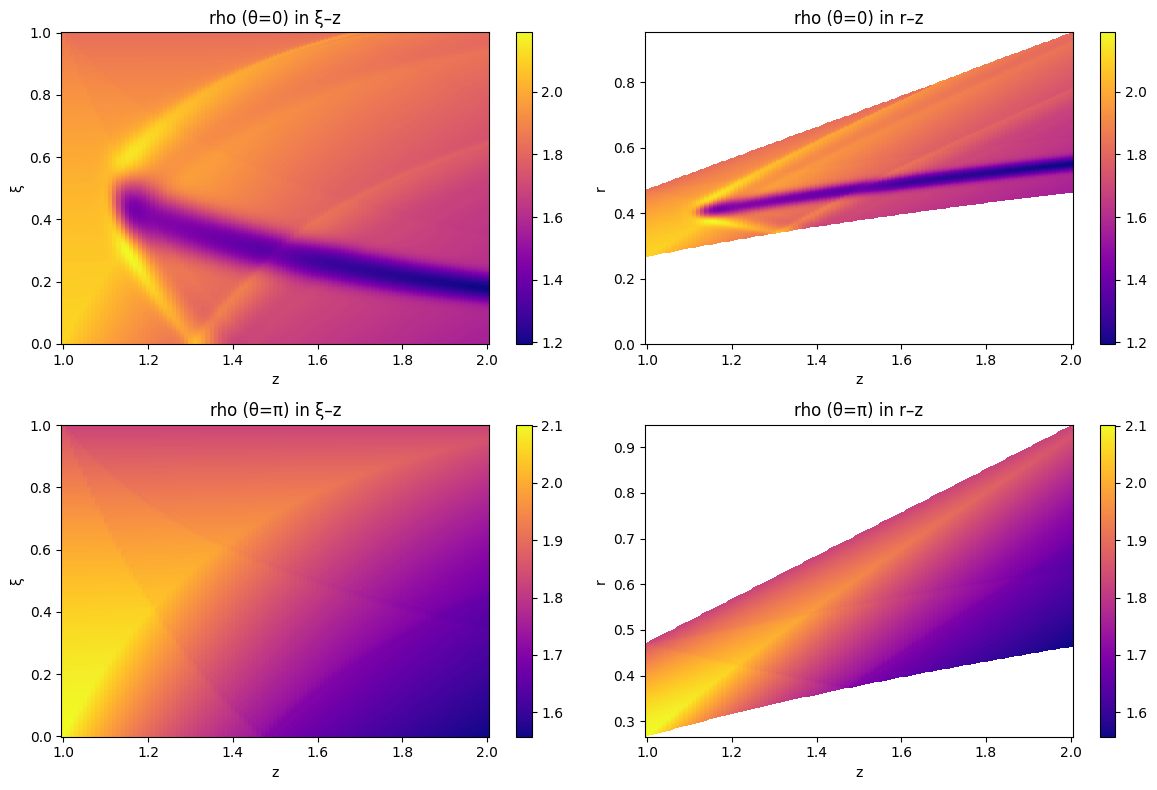

In [7]:
# размеры
# K, N, M = rho.shape
xi = np.linspace(0, 1, N)

# срезы по theta
rho_theta0 = rho[:, :, 0]    # (K, N)
rho_thetap = rho[:, :, -1]   # (K, N)

# фигура 2×2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1) ξ–z для θ=0: по X=z, Y=ξ
im0 = axs[0,0].pcolormesh(
    zs,             # X: (K,)
    xi,             # Y: (N,)
    rho_theta0.T,   # C: (N, K)
    shading='auto', cmap='plasma'
)
axs[0,0].set_title('rho (θ=0) in ξ–z')
axs[0,0].set_xlabel('z')
axs[0,0].set_ylabel('ξ')
fig.colorbar(im0, ax=axs[0,0])

# 2) r–z для θ=0: по X=z, Y=r_phys
r_phys = np.zeros_like(rho_theta0)
for k in range(K):
    rb = r_b(zs[k])
    r_phys[k,:] = rb + xi*(rs[k,0] - rb)

im1 = axs[0,1].pcolormesh(
    zs,                # X: (K,)
    xi * 0 + 0,        # dummy Y just to set axes; we'll override below
    rho_theta0.T,      # will not be used
    shading='auto', cmap='plasma'
)
# настоящий pcolormesh с (X,Y,C) всё в одном вызове:
im1 = axs[0,1].pcolormesh(
    zs,               # X: (K,)
    r_phys.T,         # Y: (N,K) as (len(y), len(x))
    rho_theta0.T,     # C: (N, K)
    shading='auto', cmap='plasma'
)
axs[0,1].set_title('rho (θ=0) in r–z')
axs[0,1].set_xlabel('z')
axs[0,1].set_ylabel('r')
fig.colorbar(im1, ax=axs[0,1])

# 3) ξ–z для θ=π
im2 = axs[1,0].pcolormesh(
    zs,
    xi,
    rho_thetap.T,
    shading='auto', cmap='plasma'
)
axs[1,0].set_title('rho (θ=π) in ξ–z')
axs[1,0].set_xlabel('z')
axs[1,0].set_ylabel('ξ')
fig.colorbar(im2, ax=axs[1,0])

# 4) r–z для θ=π
r_phys_p = np.zeros_like(rho_thetap)
for k in range(K):
    rb = r_b(zs[k])
    r_phys_p[k,:] = rb + xi*(rs[k,-1] - rb)

im3 = axs[1,1].pcolormesh(
    zs,
    r_phys_p.T,
    rho_thetap.T,
    shading='auto', cmap='plasma'
)
axs[1,1].set_title('rho (θ=π) in r–z')
axs[1,1].set_xlabel('z')
axs[1,1].set_ylabel('r')
fig.colorbar(im3, ax=axs[1,1])

plt.tight_layout()
plt.show()


In [8]:
def distribution_plot(ax, f_name):
    f_dict = {"p": p, "rho": rho, "u": u, "v": v, "w": w}
    f_cone_dict = {
        "p": p_cone,
        "rho": rho_cone,
        "u": np.sin(phi_cone) * VR_cone + np.cos(phi_cone) * Vtheta_cone,
        "v": np.zeros_like(p_cone),
        "w": np.cos(phi_cone) * VR_cone - np.sin(phi_cone) * Vtheta_cone,
    }
    f_init_values = {
        "p": 101330,
        "rho": 1.2255,
        "u": 0,
        "v": 0,
        "w": 3 * np.sqrt(1.4 * 101330 / 1.2255),
    }

    # поля
    F = f_dict[f_name]  # (K,N,M)
    Fc = f_cone_dict[f_name]  # (L,) — по φ

    # fig, ax = plt.subplots(figsize=(15, 9))
    # общие границы цвета
    vmin = min(np.nanmin(F[:, :, 0]), np.nanmin(F[:, :, -1]), np.min(Fc))
    vmax = max(np.nanmax(F[:, :, 0]), np.nanmax(F[:, :, -1]), np.max(Fc))
    # 1) pcolormesh расчётной области
    Zg = np.tile(zs, (N, 1)).T  # (K,N)
    pcm = ax.pcolormesh(
        Zg, r_phys, F[:, :, 0], shading="auto", cmap="plasma", vmin=vmin, vmax=vmax
    )
    pcm = ax.pcolormesh(
        Zg, -r_phys, F[:, :, -1], shading="auto", cmap="plasma", vmin=vmin, vmax=vmax
    )
    # 2) pcolormesh конуса
    zc = np.linspace(0, z0, 200)
    Zc = np.tile(zc, (phi_cone.size, 1))
    Rc = np.outer(np.tan(phi_cone), zc)
    pcm = ax.pcolormesh(
        Zc,
        Rc,
        np.tile(Fc, (zc.size, 1)).T,
        shading="auto",
        cmap="plasma",
        vmin=vmin,
        vmax=vmax,
    )
    pcm = ax.pcolormesh(
        Zc,
        -Rc,
        np.tile(Fc, (zc.size, 1)).T,
        shading="auto",
        cmap="plasma",
        vmin=vmin,
        vmax=vmax,
    )

    z_background = np.tile(zs, reps=(100, 1))
    t = np.linspace(0, 1, 100)  # shape (N,)
    # затем строим B[i,j] = a[j] + t[i] * (2 - a[j]):
    rs_background = rs[:, 0][np.newaxis, :] + t[:, np.newaxis] * (
        1 - rs[:, 0][np.newaxis, :]
    )
    z_cone_background = np.tile(np.linspace(0, 1), reps=(100, 1))
    rs_cone_background = np.tan(phi_cone[-1]) * np.linspace(0, 1)[np.newaxis, :] + t[
        :, np.newaxis
    ] * (1 - np.tan(phi_cone[-1]) * np.linspace(0, 1)[np.newaxis, :])

    pcm = ax.pcolormesh(
        z_background,
        rs_background,
        f_init_values[f_name] * np.ones_like(rs_background),
        shading="auto",
        cmap="plasma",
        vmin=vmin,
        vmax=vmax,
    )
    pcm = ax.pcolormesh(
        z_background,
        -rs_background,
        f_init_values[f_name] * np.ones_like(rs_background),
        shading="auto",
        cmap="plasma",
        vmin=vmin,
        vmax=vmax,
    )
    pcm = ax.pcolormesh(
        z_cone_background,
        rs_cone_background,
        f_init_values[f_name] * np.ones_like(rs_cone_background),
        shading="auto",
        cmap="plasma",
        vmin=vmin,
        vmax=vmax,
    )
    pcm = ax.pcolormesh(
        z_cone_background,
        -rs_cone_background,
        f_init_values[f_name] * np.ones_like(rs_cone_background),
        shading="auto",
        cmap="plasma",
        vmin=vmin,
        vmax=vmax,
    )

    # подписи
    plot_label_dict = {
        "p": "давления p(z,r)",
        "rho": "плотности ρ(z,r)",
        "u": "скорости u(z,r)",
        "v": "скорости v(z,r)",
        "w": "скорости w(z,r)",
    }
    # легенды
    plot_legend_dict = {
        "p": "Па",
        "rho": r"кг/$м^3$",
        "u": "м/с",
        "v": "м/с",
        "w": "м/с",
    }
    cbar = fig.colorbar(pcm, ax=ax, label=plot_legend_dict[f_name])
    ax.set_xlabel("z")
    ax.set_ylabel("r")
    ax.set_title("Полное распределение " + plot_label_dict[f_name])
    ax.axvline(x=z0, linestyle="--", color="k")
    ax.plot(
        np.hstack((np.linspace(0, z0), zs)),
        np.hstack((np.tan(phi_cone[-1]) * np.linspace(0, z0), rs[:, 0])),
        linewidth=3,
        color="white",
    )
    ax.plot(
        np.hstack((np.linspace(0, z0), zs)),
        np.hstack((-np.tan(phi_cone[-1]) * np.linspace(0, z0), -rs[:, -1])),
        linewidth=3,
        color="white",
    )
    return pcm

In [9]:
def distribution_plot_subplots(f_names, figsize=(12,10), output_name='1.png'):
    """
    f_names: список из имён полей, например ['rho','p']
    """
    fig, axs = plt.subplots(len(f_names), 1, figsize=figsize, sharex=False, sharey=False)
    pcms = []
    if len(f_names) == 1:
        pcm = distribution_plot(axs, f_names[0])
        pcms.append(pcm)
    else:
        for ax, name in zip(axs, f_names):
            pcm = distribution_plot(ax, name)
            pcms.append(pcm)

    plt.tight_layout()
    plt.savefig(output_name)
    plt.show()

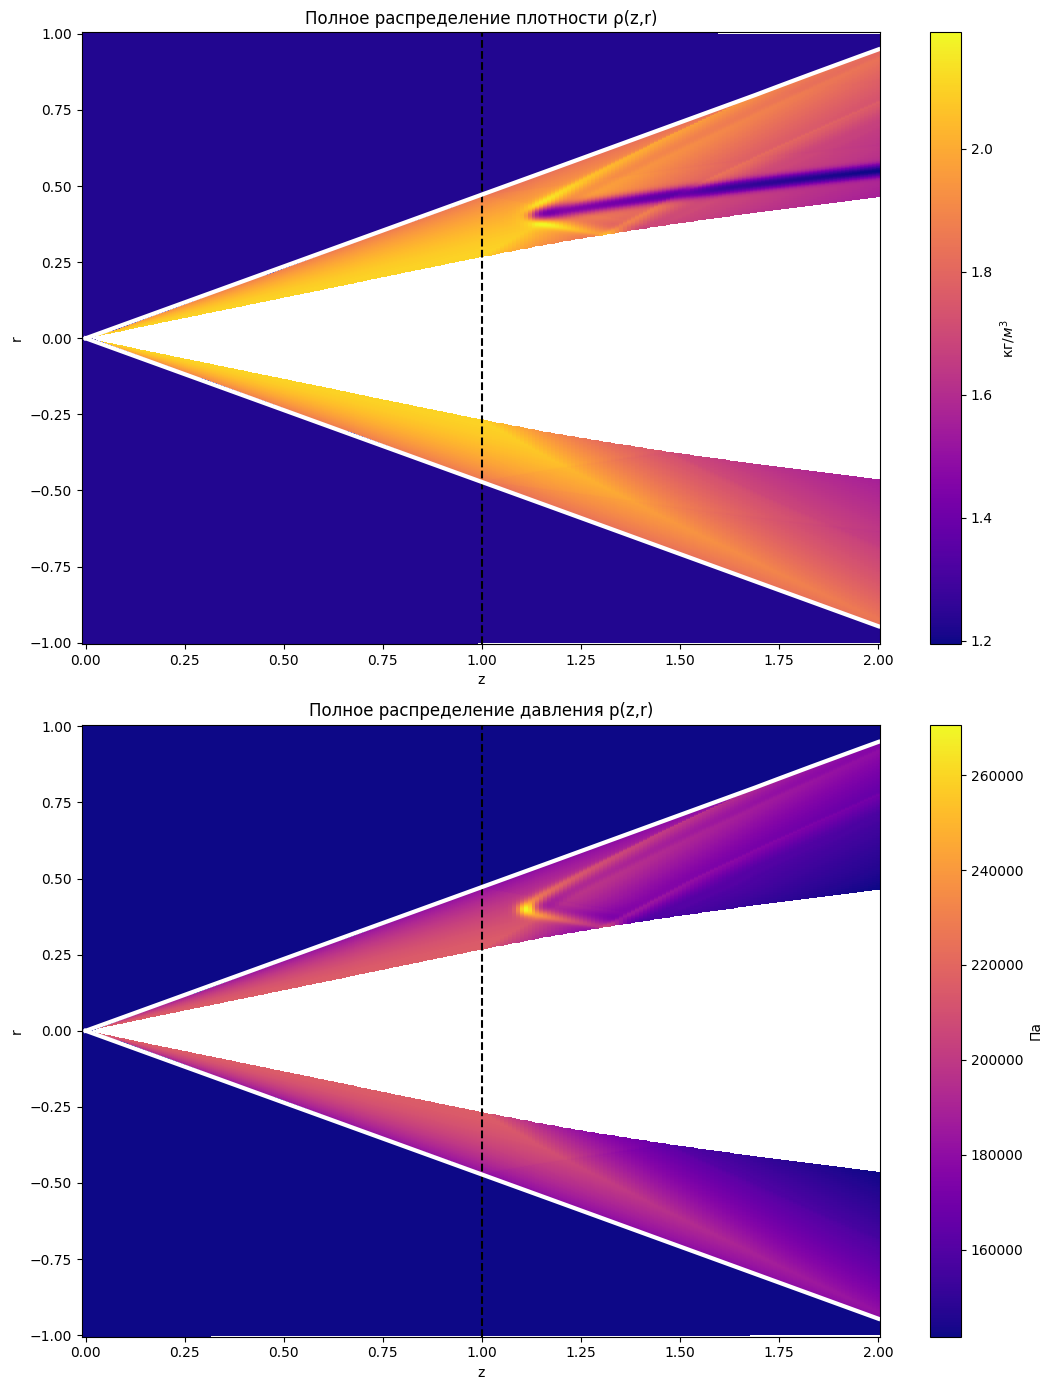

In [10]:
distribution_plot_subplots(
    ['rho', 'p'],
    figsize=(11,14),
    # output_name='pictures/parabolic_heat_rho_p.png'
)

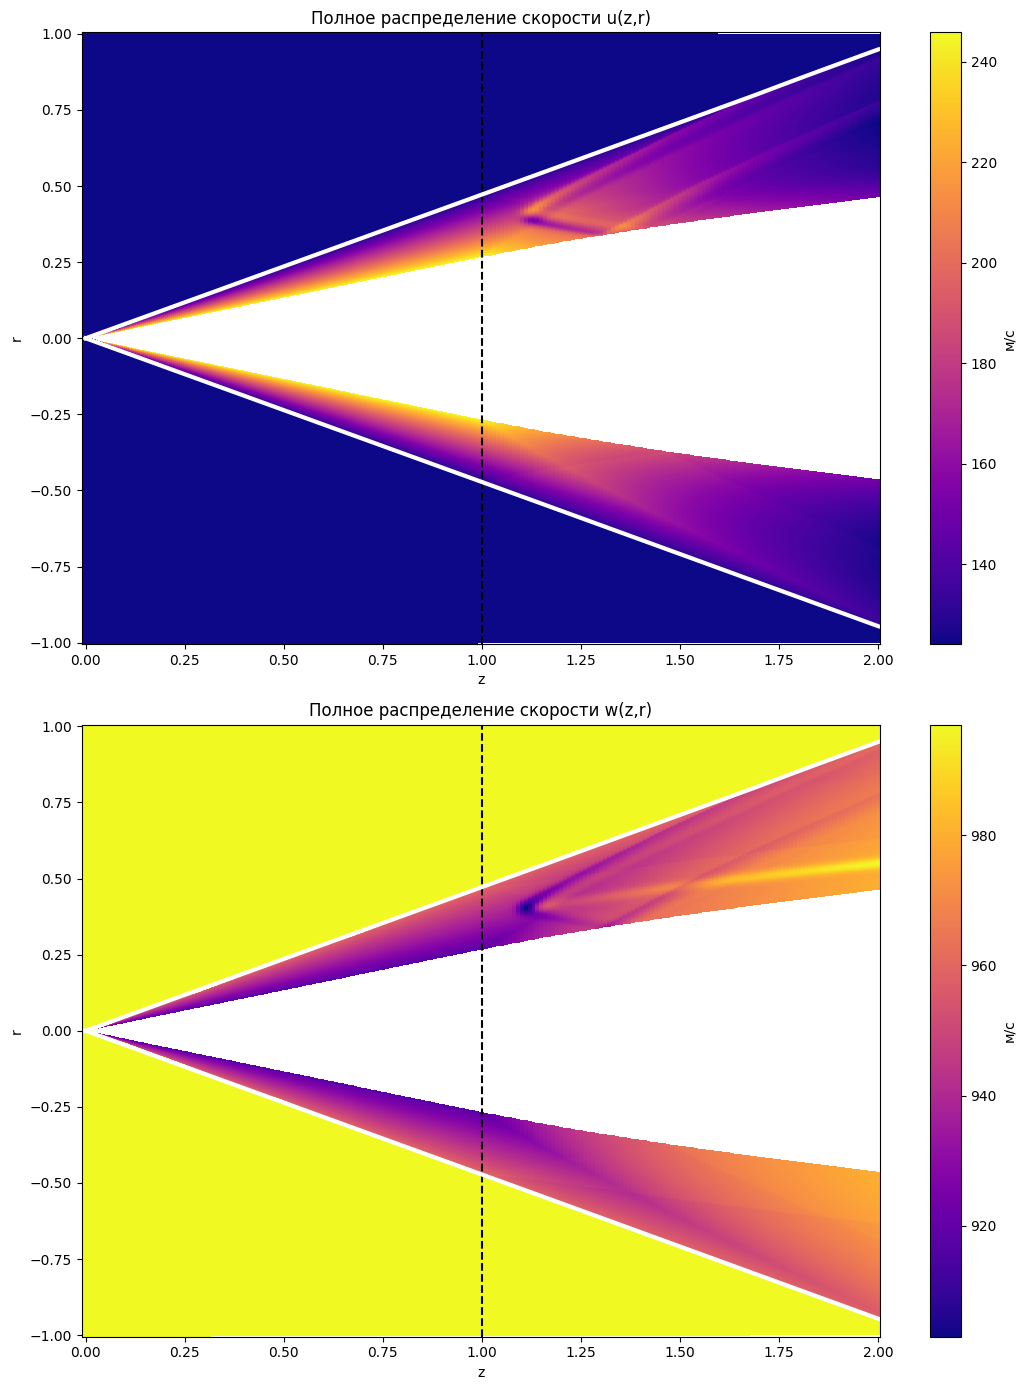

In [11]:
distribution_plot_subplots(
    ['u', 'w'],
    figsize=(11,14),
    # output_name='pictures/parabolic_heat_u_w.png'
)

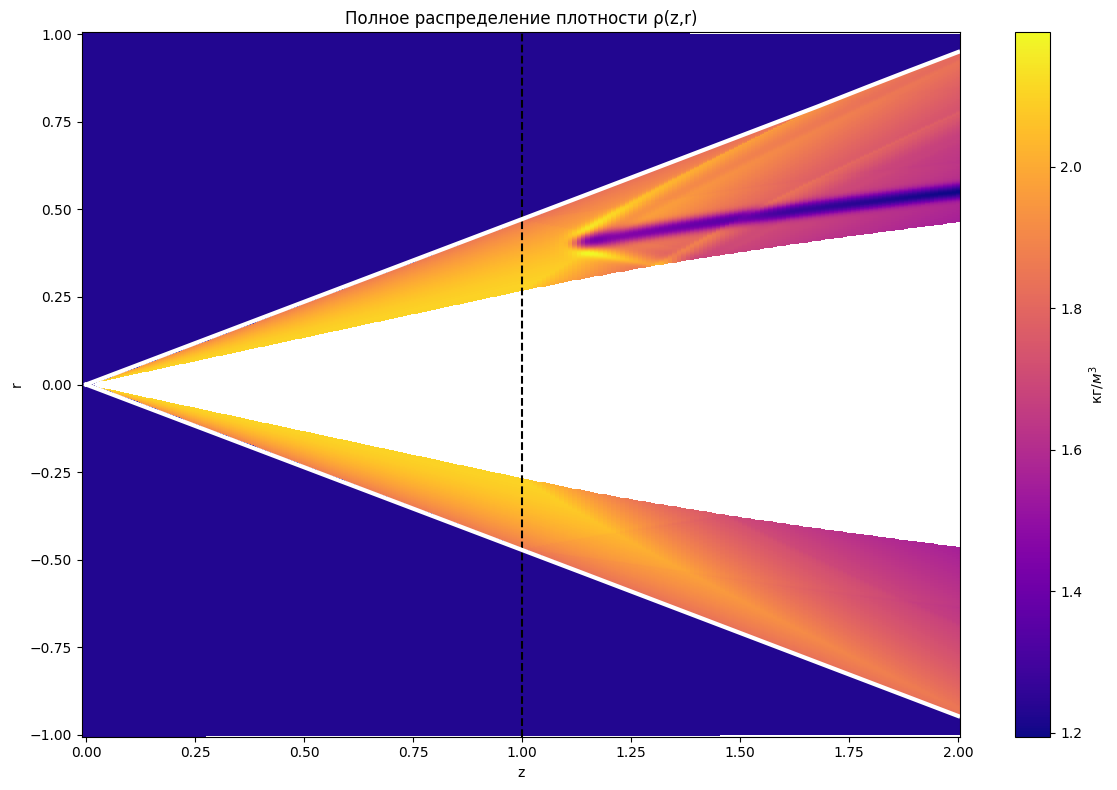

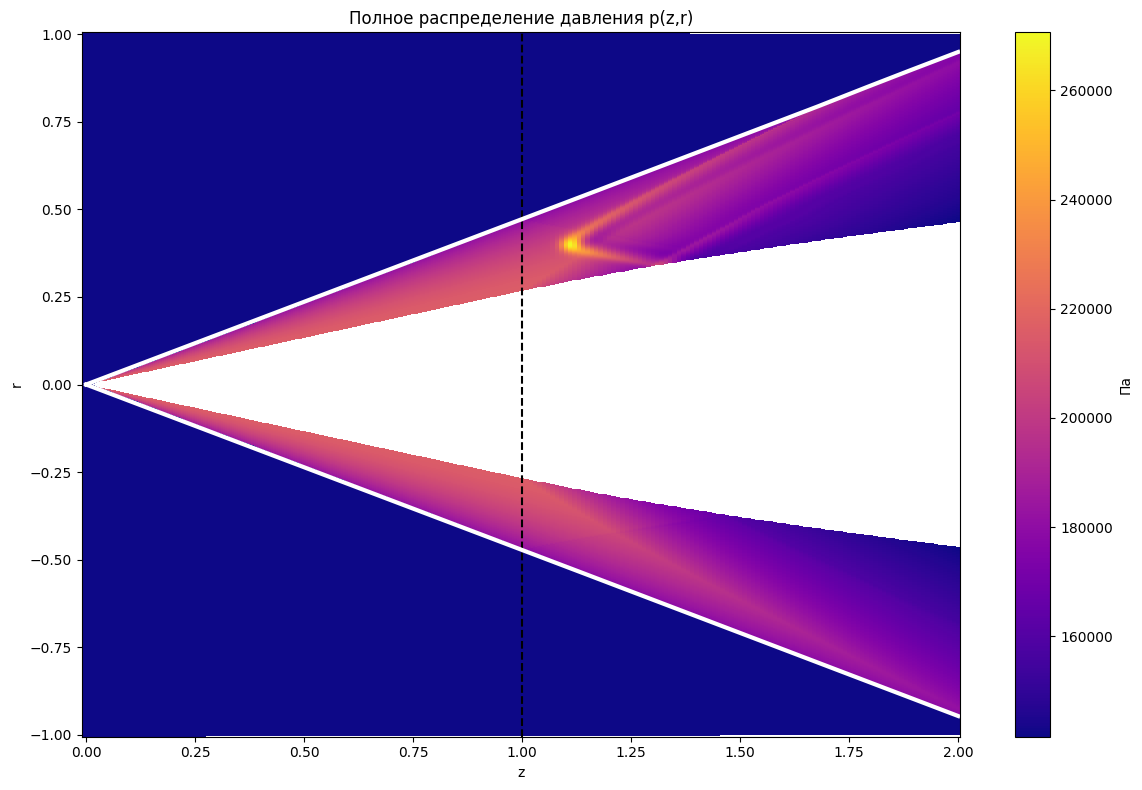

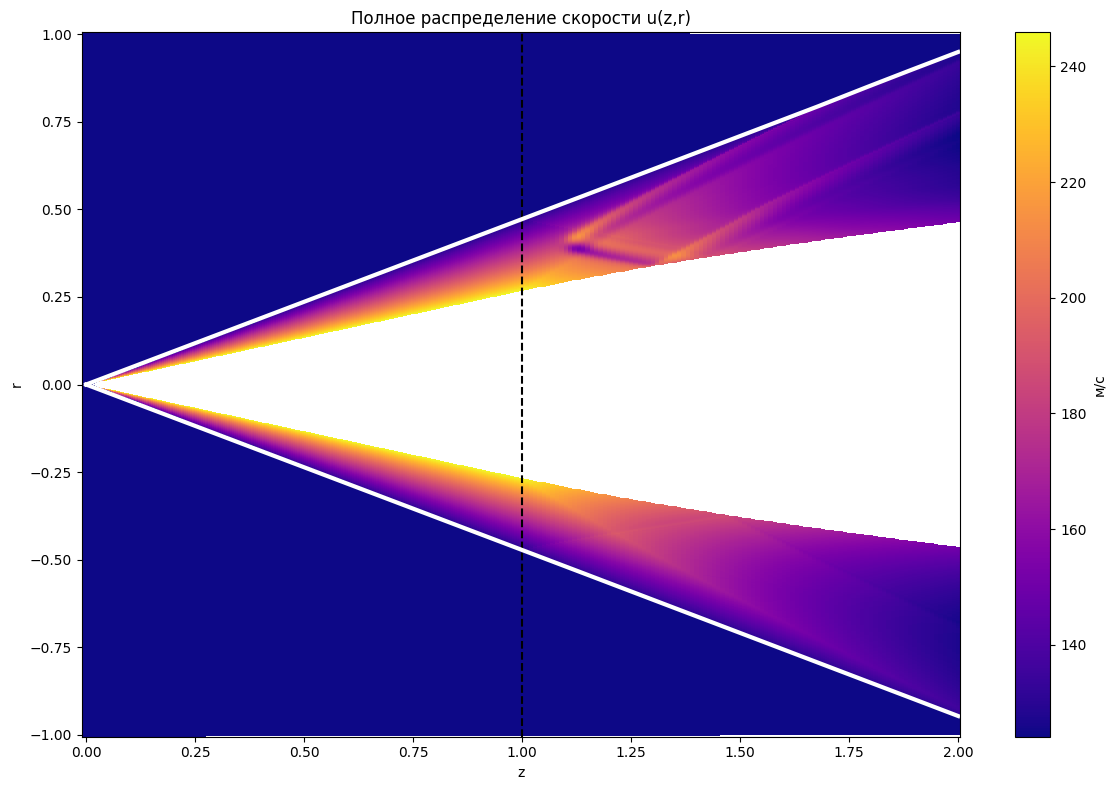

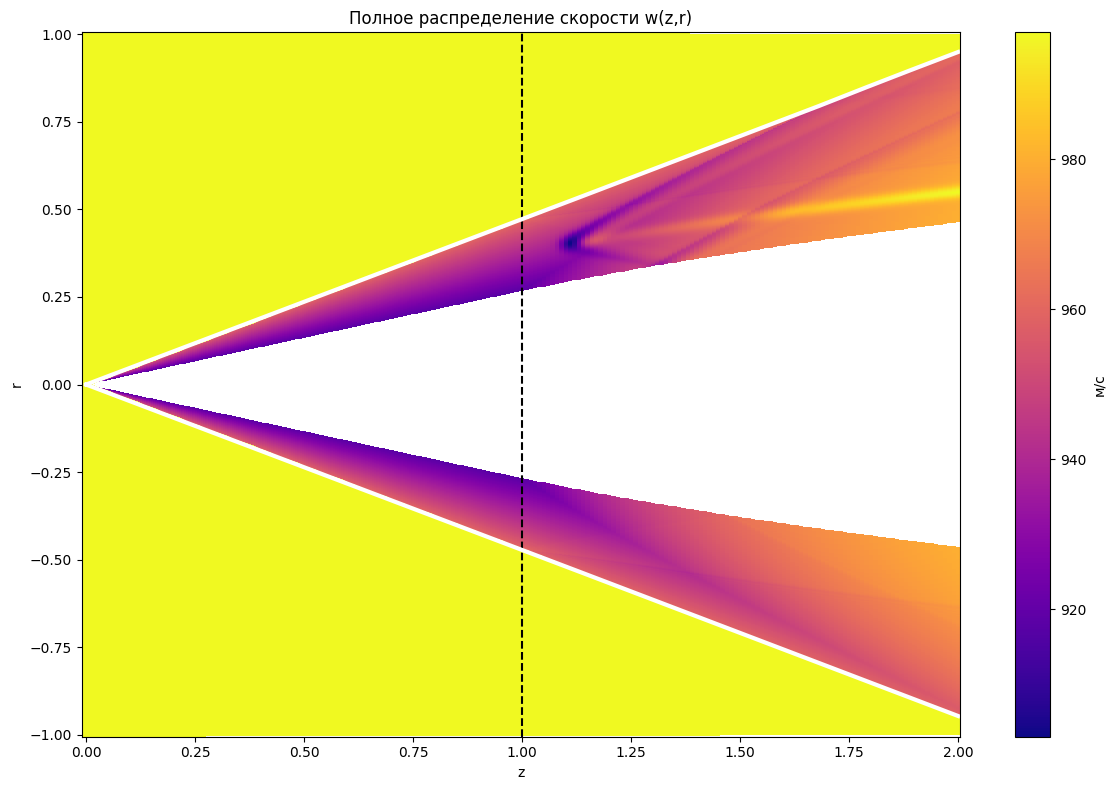

In [12]:
for func in ['rho', 'p', 'u', 'w']:
    distribution_plot_subplots([func], figsize=(12,8))

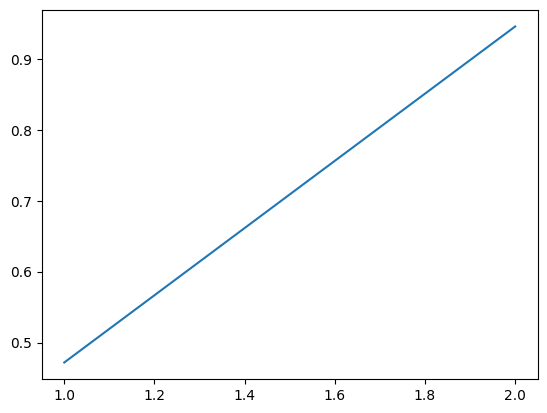

In [13]:
plt.plot(zs, rs[:,-1])

In [14]:
def load_streamfunc(filename):
    zs, psi = [], []
    i = 0
    with open(filename) as f:
        for line in f:
            if i % 2 == 0:
                zs.append(float(line))
            else:
                psi.append(list(map(float, line.split())))
            i += 1
    return np.array(zs), np.array(psi)  # zs: (K,), psi: (K,N)

psi0 = np.loadtxt('psi0_out.txt')
psip = np.loadtxt('psi1_out.txt')

f_cone_dict = {
        'p': p_cone,
        'rho': rho_cone,
        'u': np.sin(phi_cone)*VR_cone + np.cos(phi_cone)*Vtheta_cone,
        'v': np.zeros_like(p_cone),
        'w': np.cos(phi_cone)*VR_cone - np.sin(phi_cone)*Vtheta_cone
}

z_cone = np.tile(np.linspace(0, z0, 100), (phi_cone.shape[0], 1)).T

r_cone = np.outer(np.linspace(0, z0, 100), np.tan(phi_cone))

rho_cone_tile = np.tile(f_cone_dict['rho'], (100, 1))
w_cone_tile = np.tile(f_cone_dict['w'], (100, 1))

dr_cone = np.hstack((np.zeros((100, 1)), np.diff(r_cone, axis=1)))

psi_cone = np.cumsum(rho_cone_tile * w_cone_tile * r_cone * dr_cone, axis=1)

ValueError: the number of columns changed from 200 to 42 at row 6; use `usecols` to select a subset and avoid this error

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
levels_cone = np.linspace(psi_cone.min(), psi_cone.max(), 7)
levels_0 = np.unique(
    np.clip(
        np.hstack((levels_cone, np.linspace(psi_cone.max(), psi0.max(), 13))),
        a_min=psi0.min(),
        a_max=psi0.max(),
    )
)
levels_1 = np.unique(
    np.clip(
        np.hstack((levels_cone, np.linspace(psi_cone.max(), psip.max(), 13))),
        a_min=psip.min(),
        a_max=psip.max(),
    )
)
cs0 = ax.contour(np.tile(zs, (N, 1)).T, r_phys, psi0, levels=levels_0, linestyles="-")
csp = ax.contour(np.tile(zs, (N, 1)).T, -r_phys, psip, levels=levels_1, linestyles="-")
cs_cone_0 = ax.contour(z_cone, r_cone, psi_cone, levels=levels_cone, cmap=cs0.cmap, norm=cs0.norm, linestyles="-")
cs_cone_p = ax.contour(z_cone, -r_cone, psi_cone, levels=levels_cone, cmap=csp.cmap, norm=csp.norm, linestyles="-")
# ax.clabel(cs0, inline=True, fontsize=8)
# ax.clabel(csp, inline=True, fontsize=8)
ax.set_xlabel("z")
ax.set_ylabel("r")
plt.plot(
    np.hstack((np.linspace(0, z0), zs)),
    np.hstack((np.tan(phi_cone[-1]) * np.linspace(0, z0), rs[:, 0])),
    linewidth=3,
    color="black",
)
plt.plot(
    np.hstack((np.linspace(0, z0), zs)),
    np.hstack((-np.tan(phi_cone[-1]) * np.linspace(0, z0), -rs[:, -1])),
    linewidth=3,
    color="black",
)

ax.axvline(x=z0, linestyle="--", color="k")
plt.title('Линии тока')
plt.tight_layout()
# plt.savefig('pictures/parabolic_heat_streamlines.png')
plt.show()

In [ ]:
p.shape

In [ ]:
plt.plot(zs, p[:, 0, 0] - p[:, 0, -1])

In [ ]:
np.trapz(y=(-p[:, 0, 0] + p[:, 0, -1]), x=zs)

In [47]:
Fy1 = np.loadtxt('Fy_out.txt')
Fy2 = np.loadtxt('Fy_out2.txt')
Fy3 = np.loadtxt('Fy_out3.txt')
Fy = np.hstack((Fy1, Fy2, Fy3))

Mz1 = np.loadtxt('Mz_out.txt')
Mz2 = np.loadtxt('Mz_out2.txt')
Mz3 = np.loadtxt('Mz_out3.txt')
Mz = np.hstack((Mz1, Mz2, Mz3))

In [36]:
Fy

array([-7.58127e+01, -1.15253e+02, -1.39703e+02, -1.49472e+02,
       -1.53369e+02, -1.55288e+02, -1.56698e+02, -1.58346e+02,
       -1.59999e+02, -1.61532e+02, -1.62906e+02, -1.64431e+02,
       -1.65801e+02, -1.66801e+02, -1.67811e+02, -1.68458e+02,
       -1.69135e+02, -1.69631e+02, -1.70402e+02, -1.71050e+02,
       -1.72088e+02, -1.73066e+02, -1.74164e+02, -1.75598e+02,
       -1.76780e+02, -1.78189e+02, -1.79273e+02, -1.80191e+02,
       -1.81159e+02, -1.82252e+02, -1.83084e+02, -1.83907e+02,
       -1.84727e+02, -1.85547e+02, -1.86372e+02, -1.87201e+02,
       -1.88036e+02, -1.88791e+02, -1.89650e+02, -1.90424e+02,
       -1.91213e+02, -1.92117e+02, -1.92926e+02, -1.93738e+02,
       -1.94546e+02, -1.95323e+02, -1.96017e+02, -1.96640e+02,
       -1.97233e+02, -1.97954e+02, -1.98145e+02, -1.96854e+02,
       -1.92192e+02, -1.84137e+02, -1.71631e+02, -1.54381e+02,
       -1.28870e+02, -1.01960e+02, -7.27476e+01, -4.53097e+01,
       -2.41516e+01, -1.11126e+01, -5.17441e+00, -1.931

In [39]:
zs.shape


(101,)

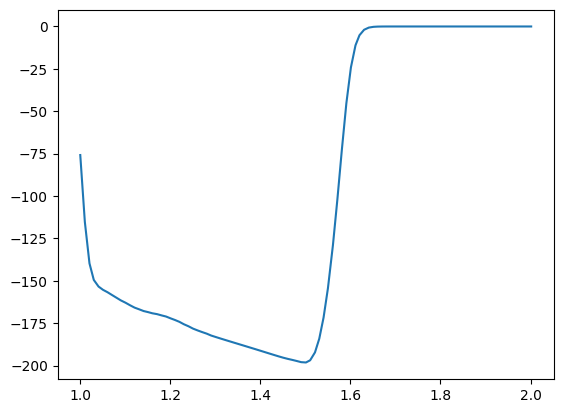

In [46]:
plt.plot(zs, Fy)

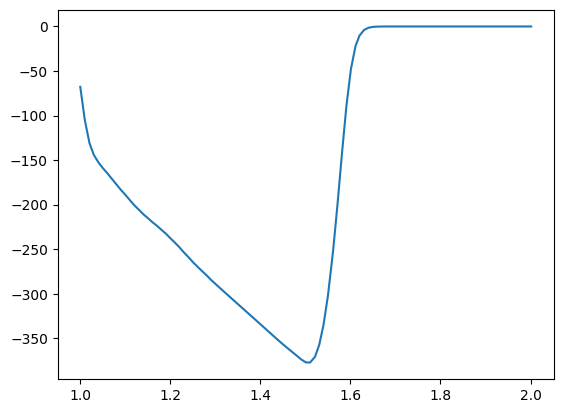

In [48]:
plt.plot(zs, Mz)

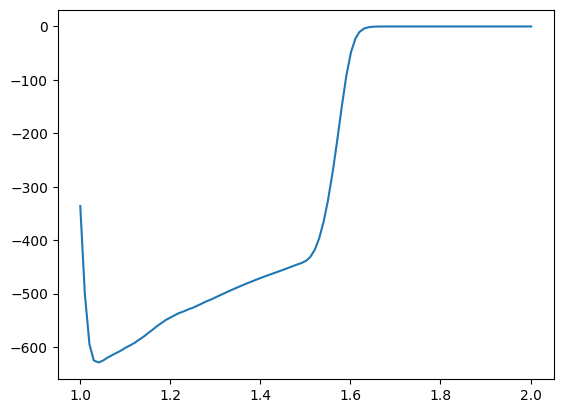

In [43]:
plt.plot(zs, Fy/S_b)

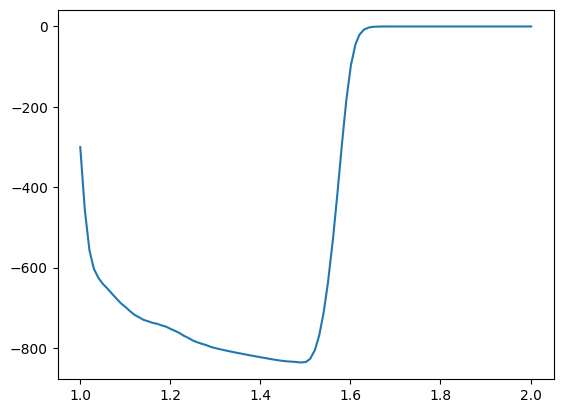

In [49]:
plt.plot(zs, Mz/S_b)

In [45]:
np.sqrt(1.4*101330/1.2255)*3

1020.6988749824567